Saving data_banknote_authentication - data_banknote_authentication.csv to data_banknote_authentication - data_banknote_authentication.csv
Logistic Regression Accuracy :  0.9854545454545455
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.98      0.98      0.98       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



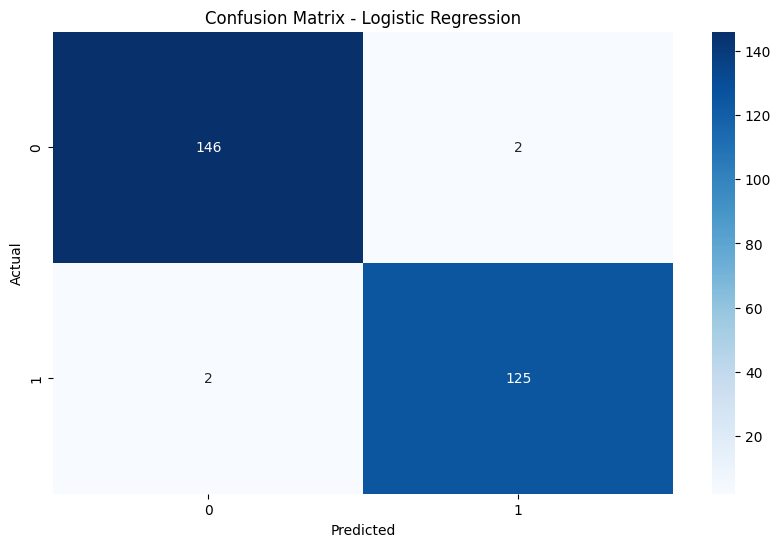

Predicted Note Authentication :  Fake


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import files

columns = ["Variance", "Skewness", "Curtosis", "Entropy", "Class"]

uploaded = files.upload()
filename = list(uploaded.keys())[0]
dataset = pd.read_csv(filename, names=columns)
dataset.head()

X = dataset.drop('Class', axis=1)
y = dataset['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy : ", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

def predict_note_authentication(variance, skewness, curtosis, entropy):
    sample = np.array([[variance, skewness, curtosis, entropy]])
    prediction = log_model.predict(sample)
    return "Authentic" if prediction[0] == 1 else "Fake"

example_prediction = predict_note_authentication(2.3, -1.5, 3.1, -0.8)
print("Predicted Note Authentication : ", example_prediction)